In [2]:
import numpy as np  # Import numpy
import matplotlib.pyplot as plt  # Import matplotlib
import math  # Import math
from scipy.integrate import quad  # Import quad from scipy

In [3]:
def Jdensity(x):
    y=[]
    for i in range(len(x)):
        if abs(x[i])<=0.5:
            y.append(1- (abs(x[i])/0.5))
        elif abs(x[i])>0.5:
            y.append(0)
    return y

In [4]:
def a(x):
    if abs(x)<=0.5:
        return 1- (abs(x)/0.5)  
    else:
        return 0

In [5]:
def Jdcurrent(x,k):
    return a(x)*math.cos(k*x)    

In [6]:
def current(k):
    return 0.5 * (math.sin(k/4))**2 / (k/4)    

In [7]:
def triangular():
    x=[]
    y=[]
    Jcmax = 0 
    for i in range(0,200):
        val = quad(Jdcurrent, -0.5, 0.5, args=(4*math.pi * i/10))
        if i == 0:
            Jcmax = val[0]
        x.append(i/10)
        y.append(abs(val[0])/ Jcmax)

        
    xx = np.linspace(-0.50, 0.50, 1000)
    yy  = Jdensity(xx)
    
    plt.style.use("seaborn-talk")
    

    fig, ax = plt.subplots()
    ax.plot(x, y, color = "blue", lw = "2", linestyle = "-")
    ax.set_title(r"Plot between $\frac{I_{1}(\phi)}{I_{1}(0)}$ vs $\phi/\phi_{0}$ for triangular current density profile ")
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xlabel(r"$\phi/\phi_{0}$")
    ax.set_ylabel(r"$\frac{I_{1}(\phi)}{I_{1}(0)}$")
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 1.1)
    ax.fill_between(x, y, color = "blue", alpha = 0.1)

    axins  = ax.inset_axes([0.47, 0.47, 0.4, 0.4], zorder = 2)
    axins.grid(True, linestyle='--', linewidth=0.5)
    axins.set_xlim(-0.5, 0.5)
    axins.set_xlabel(r"$L$")
    axins.set_ylabel(r"$J_{1}$")
    axins.plot(xx, yy, color = "brown", lw = "2", linestyle = "-", alpha=1)
    axins.fill_between(xx, yy, color = "yellow", alpha=0.3)
    # axins.set_ylim(0, 1.1)
    #plt.legend()
    # fig = plt.gcf()
    # fig.set_size_inches(12, 8)
    #plt.savefig("plotting\Plot_triangle.png")
    plt.show()

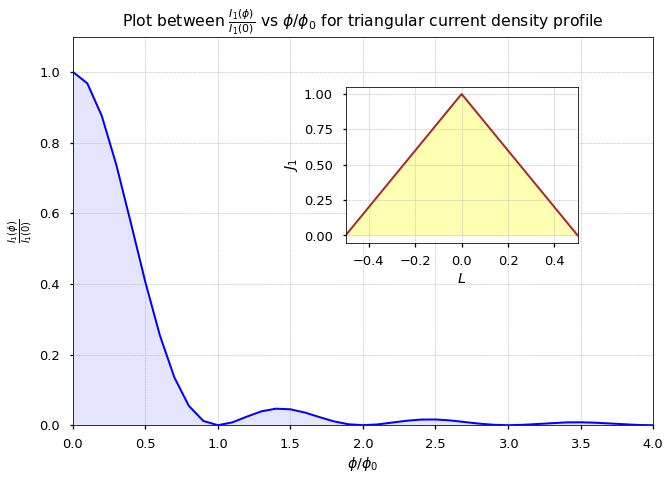

In [8]:
triangular()